# Binary classification by linear regression in Python

### Overview
Although linear regression is labelled as a regression technique it can be used for classification. In this demonstration I will use linear regression for binary classification.

### Environment
I implemented a solution in `Anaconda` environment with `Python 3.8.5` as this is essentially 'data-science'. This makes it possible to comparing my results to that of `sci-kit-learn`.

### Terminology
1. $y^{(i)}$; **true** (actual) class label.
2. $\hat{y}^{(i)}$; **predicted** class label.
3. $x^{(i)}$; training example.
4. $\phi(z)$; decision function.
5. $\displaystyle\sum_{j=0}^{m} x_j w_j$; linear algebra product of weights to sample-features.
6. $\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j$; difference in weight between epochs.

### Algorithm pseudo-code
1. Initialize weights $w$ to small random numbers.
2. For each training sample $x^{(i)}$:  
    a. Compute decision $\phi(z)$ for output $\hat{y}$  
    b. Update weights; $w_j := w_j + \Delta w_j$, and $\Delta w_j$ is derived by; $\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j$

### Related Git
https://dev.azure.com/Rose-Software-Ltd/_git/LinearRegressionPython

## Demonstration setup
Import my Python package components from `my_linear_regression` and instantiate a linear regressor for binary classification.

1. `kwargs` has been defined for the `DataSplitter`, this will:  
    a. Reduce the problem space to 2 classes.  
    b. Define the problem space as ints.  


In [1]:
#!/usr/bin/env python3.8.5
# Copyright 2021, Rose Software Ltd, All rights reserved.

# Project imports.
from my_linear_regression.linear_regression import LinearRegressor
from my_linear_regression.splitter.data_splitter import DATA_DIR as dir_

# Third party imports.
from matplotlib import pyplot as plot

# Prepare instructions to split the file for binary classification.
kwargs = {
    'file_path': dir_,
    'split': 0.4,
    'cls_field': 'species',
    'cls_space_size': 2,
    'cls_to_keep': {'Iris-versicolor', 'Iris-setosa'}, # need method to remove class by name!
    'y_seed': -1,
    'y_interval': 2,
    'prepare': True,
}

# Instantiate a Perceptron linear regressor.
my_lr = LinearRegressor(**kwargs)


## Check that the data frame looks ok
1. Count the number of samples that remain after splitting the data frame.
1. Inspect 2 samples $x^i$ from the bottom and the top of the splitter dataframe. Make sure that the integer representation of the class is included.
1. Check that the data set class space has been reduced to 2 classes (as this is a binary classification demonstration).
1. Check that there is a weight per feature, plus 1 for the bias.

In [2]:
print(len(my_lr.splitter.data))

100


In [3]:
my_lr.splitter.data.head(2).append(my_lr.splitter.data.tail(2))

,sepal_length,sepal_width,petal_length,petal_width,species,class_int_rep
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
148,6.2,3.4,5.4,2.3,Iris-virginica,-1
149,5.9,3.0,5.1,1.8,Iris-virginica,-1


In [4]:
print(set(my_lr.splitter.data['species']))

{'Iris-virginica', 'Iris-setosa'}


In [5]:
print(f"There are {len(my_lr.weights)} weights in wi.")

There are 5 weights in wi.


## Plot the data frame to see if it can be solved by linear regression
**Iris setosa** and **Iris-versicolour** are **linearly separable**, other groupings might not be.

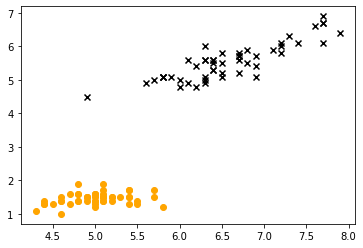

In [6]:
labels = my_lr.splitter.data.iloc[0: 100, 4].values
X = my_lr.splitter.data.iloc[0: 100, [0,2]].values

plot.scatter(x=X[:50, 0], y=X[:50, 1], color='orange', marker='o', label=labels[0])
plot.scatter(x=X[50: 100, 0], y=X[50: 100, 1], color='black', marker='x', label=labels[-1])


## Solving a binary classification problem


In [7]:
# Train (fit) the model.
my_lr.train_model()

# Look at solutions.
for report in my_lr.solutions:
    for key, val in report.items():
        print(key, val)



epoch 0
errors 0
error rate 0.0
weights [-0.97254605  0.64196043  0.98689528  0.18461368  0.59003456]
function f(x*T([-0.97254605  0.64196043  0.98689528  0.18461368  0.59003456])


In [8]:
# Test solution.
w, y = my_lr.test_model('Predicted-class')

print(len(y))
a = 0
b = 0
for x in y:
    if x[0]='Iris-virginica':
        a+=1
    else:
        b+=1

print(a,b)

60
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-setosa' 1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virginica' -1 True]
['Iris-virg